Using the dataset __Boston__: <br>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error

boston = pd.read_csv(r'./Datasets/Boston.csv')
data_boston = boston.iloc[:,:-1]
target_boston = boston.iloc[:,-1]

X_train, X_val, y_train, y_val = train_test_split(data_boston, 
                                                    target_boston, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                   )

In [2]:
lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_val)

Create a second linear model named 'lin_model2' where you are going to mantain the regressors that are more correlated with the dependent variable. <br>
Don't forget that when dealing with regressors with high correlation, you should mantain only one of them (to avoid the problem of multicollinearity).

In [3]:
# join the X_train and y_train in one dataset named 'train' to plot the correlation between all variables
train = X_train.join(y_train)

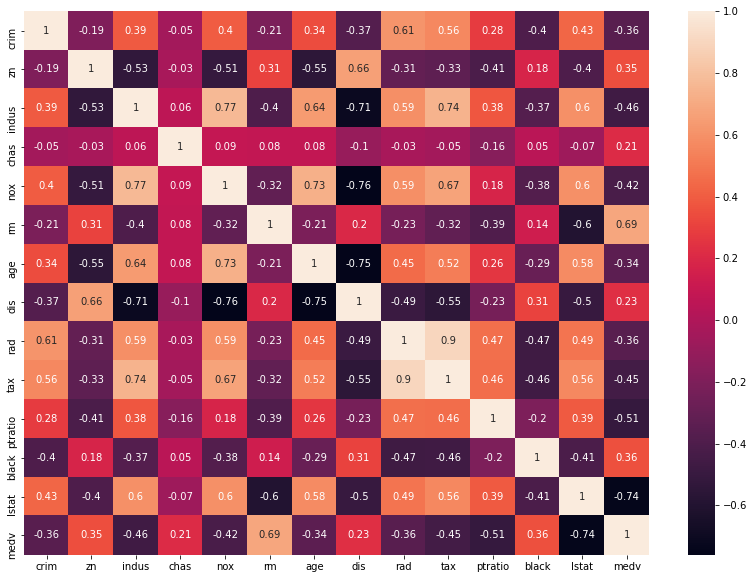

In [4]:
# plot the correlation matrix between all the variables (training set)
corr = train.corr().round(2)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
sns.heatmap(data = corr, annot = True)

The only variable that is correlated with the dependent variable ('medv') , assuming a threshold of 0.7 is lstat. <br>
To build the model, let's consider all the variables that have a correlation higher than 0.5 : rm, ptratio and lstat.

In [5]:
# let's remove all the variables that we don't want to use to build the model
X_train = X_train[['rm','ptratio','lstat']]
X_val = X_val[['rm','ptratio','lstat']]

In [6]:
# build a second linear model named lin_model2.
lin_model2 = LinearRegression()

In [7]:
# fit the new data to the model lin_model2
lin_model2.fit(X_train, y_train)

LinearRegression()

In [8]:
# predict the values for X_val and named it as y_pred2
y_pred2 = lin_model2.predict(X_val)

In [9]:
r2 = r2_score(y_val, y_pred)
n = len(y_val)
p = len(X_train.columns)

def adj_r2 (r2,n,p):
    return 1-(1-r2)*(n-1)/(n-p-1)

adj_r2(r2,n,p)

0.6826486254121094

In [10]:
# Compare the results between lin_model and lin_model2
# create an empty dataframe to present the results 
metrics_df = pd.DataFrame(columns=['r^2 score', 'adj_r^2', 'expl_var', 'mae', 'mse', 'medAE'])

def results_table(model, y_pred):
    metrics = []
    metrics.append(r2_score(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    metrics.append(adj_r2(r2,len(y_val),len(X_train.columns)))
    metrics.append(explained_variance_score(y_val, y_pred))
    metrics.append(mean_absolute_error(y_val, y_pred))
    metrics.append(mean_squared_error(y_val, y_pred))
    metrics.append(median_absolute_error(y_val, y_pred))
    metrics_df.loc[model] = metrics

results_table('lin_model', y_pred)
results_table('lin_model2', y_pred2)

metrics_df

,r^2 score,adj_r^2,expl_var,mae,mse,medAE
lin_model,0.692075,0.682649,0.696421,3.686087,23.812245,2.820965
lin_model2,0.718916,0.710311,0.726156,3.622166,21.736594,3.028719
